## Technical Specification

The technical task needs to be entirely executed using the Python programming language. Manual alterations in the Excel table are NOT PERMITTED.

The file "data.xlsx" contains data related to the receipt of monetary funds from clients of company N for the purchase of its services.

Available fields:

● client_id - ID of clients;

● sum – Amount of monetary funds;

● status – Payment status;

● sale – Manager who closed the deal;

● new/current – Deal status;

● document – Existence of the original signed contract with the client;

● receiving_date – Date of receiving the original contract.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import calendar
import seaborn as sns  
import matplotlib.pyplot as plt

In [2]:
# Reading EXCEL file as pandas DataFrame
df = pd.read_excel('data.xlsx')
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


### Data Cleaning
As you can see from the data, the `status` column contains the months of transactions in addition to the payment status. Let's create an additional date column.

In [3]:
# Unique data in the "status" column
df.status.unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [4]:
# Dictionary with dates
dates = {'Май 2021': 'May 2021', 'Июнь 2021': 'June 2021', 'Июль 2021': 'July 2021', 
         'Август 2021': 'August 2021', 'Сентябрь 2021':'September 2021', 'Октябрь 2021': 'October 2021'}
# DataFrame with dates from 'df'
df_dates = df.query('status in @dates.keys()').status

df['dates'] = 0 # creating the 'dates' column with zeros
# Filling up the 'dates' column with months from the 'dates' dictionary
for i in df_dates.index:
    df.loc[i:,'dates'] = dates[df_dates[i]]
    
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date,dates
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN,May 2021
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-,May 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00,May 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,May 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00,May 2021


In [5]:
# Convert the 'dates' column to datetime
df['dates'] = pd.to_datetime(df['dates'])

Next, let's delete the `Unnamed: 5` column, rows with months, rename the “new/current” column and replace “-” with NaN.

In [6]:
df.drop(columns=['Unnamed: 5'], inplace=True) # dropping columns
df.drop(index=df_dates.index, inplace=True) # dropping indexes
df.rename(columns={'new/current': 'new_current','sum': 'Sum_'}, inplace=True) # renaming columns
df.replace('-', np.nan, inplace=True) # replacing '-' to NaN

In [7]:
df.isna().sum() # number of missing (NaN) values in each column

client_id           0
Sum_                0
status              0
sale                1
new_current         1
document           16
receiving_date    118
dates               0
dtype: int64

The `reception_date` and `document` columns contain a large number of missing values. Let's check them.

In [11]:
df.query('document == "НЕТ"').receiving_date.unique()

array(['NaT'], dtype='datetime64[ns]')

The code snippet above shows that if the original signed agreement with the client is <b>NOT</b> available (document == "НЕТ"), then the date of receipt of the original agreement is missing (NaT), i.e. everything is logical.

In [9]:
df.query('receiving_date == "NaT" and document.isnull()')

,client_id,Sum_,status,sale,new_current,document,receiving_date,dates
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT,2021-05-01
459,256.0,2351.2,ОПЛАЧЕНО,Филимонова,текущая,NaN,NaT,2021-08-01
489,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,NaN,NaT,2021-09-01
689,228.0,6393.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,NaT,2021-10-01
690,228.0,1603.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,NaT,2021-10-01


Here, the code produces a table where there is no mark indicating the presence of the original signed agreement with the client (NaN) and, accordingly, the date of receipt of the original agreement is also missing (NaT). Here, it would be logical to put the NO mark (<b>HET</b>) in the `document` column.

In [10]:
ind_doc_1 = df.query('receiving_date == "NaT" and document.isnull()').index
df.loc[ind_doc_1, 'document'] = 'НЕТ'
df.loc[ind_doc_1]

,client_id,Sum_,status,sale,new_current,document,receiving_date,dates
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,НЕТ,NaT,2021-05-01
459,256.0,2351.2,ОПЛАЧЕНО,Филимонова,текущая,НЕТ,NaT,2021-08-01
489,30.0,3833.7,В РАБОТЕ,Филимонова,текущая,НЕТ,NaT,2021-09-01
689,228.0,6393.7,ОПЛАЧЕНО,Смирнов,текущая,НЕТ,NaT,2021-10-01
690,228.0,1603.7,ОПЛАЧЕНО,Смирнов,текущая,НЕТ,NaT,2021-10-01


In [11]:
df.query('receiving_date != "NaT" and document.isnull()')

,client_id,Sum_,status,sale,new_current,document,receiving_date,dates
47,87.0,9948.7,ОПЛАЧЕНО,Смирнов,новая,NaN,2021-06-17,2021-05-01
48,90.0,16123.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28,2021-05-01
49,91.0,1053.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-28,2021-05-01
93,198.0,4458.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-07-01,2021-05-01
189,115.0,298.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-07-14,2021-06-01
337,228.0,2193.7,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-10-06,2021-07-01
376,32.0,7101.7,ОПЛАЧЕНО,Филимонова,текущая,NaN,2021-10-06,2021-08-01
409,90.0,8454.2,ОПЛАЧЕНО,Смирнов,текущая,NaN,2021-09-20,2021-08-01
453,339.0,7553.7,ОПЛАЧЕНО,Петрова,новая,NaN,2021-10-11,2021-08-01
488,24.0,18142.7,ОПЛАЧЕНО,Андреев,текущая,NaN,2021-10-15,2021-09-01


Finally, this code returns a table where the status of the presence of the original signed agreement with the client is missing (NaN). At the same time, there is a date for receiving the original contract. <b>If there is a date, then there must be the original contract</b>. We need to put the original (<b>оригинал</b>) in the `document` column.

In [12]:
ind_doc_2 = df.query('receiving_date != "NaT" and document.isnull()').index
df.loc[ind_doc_2, 'document'] = 'оригинал'
df.loc[ind_doc_2]

,client_id,Sum_,status,sale,new_current,document,receiving_date,dates
47,87.0,9948.7,ОПЛАЧЕНО,Смирнов,новая,оригинал,2021-06-17,2021-05-01
48,90.0,16123.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-07-28,2021-05-01
49,91.0,1053.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-07-28,2021-05-01
93,198.0,4458.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-07-01,2021-05-01
189,115.0,298.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-07-14,2021-06-01
337,228.0,2193.7,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-10-06,2021-07-01
376,32.0,7101.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-10-06,2021-08-01
409,90.0,8454.2,ОПЛАЧЕНО,Смирнов,текущая,оригинал,2021-09-20,2021-08-01
453,339.0,7553.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-10-11,2021-08-01
488,24.0,18142.7,ОПЛАЧЕНО,Андреев,текущая,оригинал,2021-10-15,2021-09-01


#### Tasks:
1) Calculate the total revenue for <b>July 2021</b> for those transactions whose cash receipts are <b>not overdue (не просрочен)</b>.

In [13]:
# DataFrame for July 2021 with status 'not expired'
quest_1 = df.query('dates == "2021-07-01" and status != "ПРОСРОЧЕНО"')

sum(quest_1['Sum_'])

859896.4699999987

<b>Answer</b>: Total revenue for July 2021 from non-overdue transactions is approximately 859896.5

2) How did the company’s revenue change during the <b>period under review</b>? Illustrate with a graph.

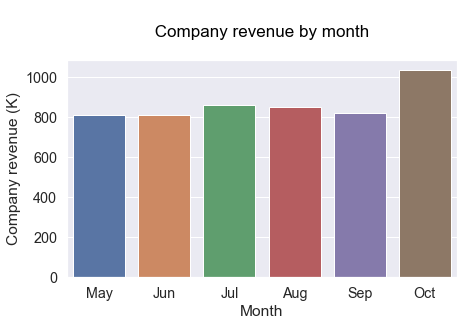

In [13]:
# Revenue values for each month
quest_2 = df.groupby('dates')['Sum_'].agg(['sum'])

sns.set(font_scale=1.3) # Text size
fig, ax = plt.subplots(figsize=(7,4)) # Adjusting the figure's dimensions by specifying its width and height.

sns.barplot(x=np.array(calendar.month_abbr)[5:11], y=quest_2['sum']/1000) # bar chart

plt.title('\n Company revenue by month \n', size=17, color='black')
plt.ylabel("Company revenue (K)")
plt.xlabel("Month")
plt.show()

3) Which <b>manager</b> raised the <b>most money for the company in September 2021</b>?

In [15]:
quest_3 = df.query('dates == "2021-09-01"') # data for September 2021
quest_3.groupby('sale')['Sum_'].sum().sort_values(ascending=False) # summarized revenue for each manager for September 2021

sale
Смирнов       221525.70
Петрова       149344.46
Андреев       133652.50
Иванов         94770.60
Кузнецова      72228.40
Филимонова     59514.47
Васильев       49895.45
Соколов        35183.50
Михайлов        4268.70
Name: Sum_, dtype: float64

<b>Answer</b>: Смирнов (Smirnov)

4) What <b>type of deals (new/current)</b> was dominant in <b>October 2021</b>?

In [16]:
quest_4 = df.query('dates == "2021-10-01"') # data for October 2021
quest_4.groupby('new_current')['Sum_'].agg(['sum', 'count'])

,sum,count
new_current,,
новая,273493.50,36
текущая,759654.89,99


<b>Answer</b>: Current (текущая) transactions prevailed in October 2021 both in terms of revenue and their number.

5) How many <b>original agreements</b> for <b>May transactions</b> were received in <b>June 2021</b>?

In [17]:
# A column with months of 'receiving_date'
df['receiving_date_month'] = df['receiving_date'].replace('-', np.nan).dt.month 
len(df.query('dates == "2021-05-01" and receiving_date_month == 6'))

77

<b>Answer:</b> 77

6. For each concluded deal, the manager receives a bonus, which is calculated as follows.

- For <b>new transactions</b>, the manager receives <b>7%</b> of the amount, provided that the payment status is “PAID” <b>«ОПЛАЧЕНО»</b>, and there is also an <b>original</b> signed agreement by the client (<b>in the month in question</b>).

- For <b>current transactions</b>, the manager receives <b>5%</b> of the amount if it is <b>more than 10 thousand</b>, and <b>3%</b> of the amount if less. In this case, the payment status can be anything other than “EXPIRE” <b>«ПРОСРОЧЕНО»</b>, and it is also necessary to have the <b>original</b> signed agreement with the client (<b>in the month in question</b>).

Bonuses for transactions for which the originals arrive later than the month in question are considered a balance for the next period, which is paid as the originals arrive. Calculate the balance of each manager as of 07/01/2021.

In [18]:
# All sales for May and June (256 deals)
df_5_6 = df.query('dates == "2021-05-01" or dates == "2021-06-01"')

# Sales for May and June with contract received after June
df_after_6 = df_5_6.query('receiving_date_month != 5 and receiving_date_month != 6')

DataFrame 'df_after_6' contains all transactions for which the originals have not arrived as of 06/30/2021, i.e. Bonuses were not accrued on these transactions in May and June and they are considered balances (will be accrued later). Thus, we need to calculate bonuses for this table and this will be the unpaid balance of each manager as of 07/01/2021.

Because at the time of 07/01/2021, we do not yet know whether the originals will be provided, we ignore the `document` column, and bonuses will be awarded if the originals are provided and in the month when they are provided.

In [19]:
# DataFrame with new deals
df_after_6_new = df_after_6.query('new_current == "новая" and status == "ОПЛАЧЕНО"')

# DataFrame with summarized bonuses for each manager for new deals
df_after_6_new_bonus = (df_after_6_new.groupby('sale')['Sum_'].agg(['sum'])*0.07).rename(columns={'sum': 'bonus_new'})
df_after_6_new_bonus

,bonus_new
sale,
Васильев,187.509
Петрова,2877.448
Селиванов,4336.913
Смирнов,213.759
Филимонова,727.468


Above, there are the bonuses for new transactions for each manager as of 07/01/2021.

In [20]:
# DataFrame with current deals that are more than 10000
df_after_6_cur_10 = df_after_6.query('new_current == "текущая" and status != "ПРОСРОЧЕНО" and Sum_ > 10000')

# DataFrame with summarized bonuses for each manager for current deals that are more than 10000
df_after_6_cur_bonus_10 = (df_after_6_cur_10.groupby('sale')['Sum_'].agg(['sum'])*0.05).rename(columns={'sum': 'bonus_cur_10'})
df_after_6_cur_bonus_10

,bonus_cur_10
sale,
Андреев,2141.255
Иванов,3742.670
Кузнецова,631.988
Петрова,2289.855
Смирнов,4847.550


Above, there are the bonuses of current transactions for each manager as of 07/01/2021, which are more than 10 thousand.

In [21]:
# DataFrame with current deals that are less than 10000
df_after_6_cur = df_after_6.query('new_current == "текущая" and status != "ПРОСРОЧЕНО" and Sum_ <= 10000')

# DataFrame with summarized bonuses for each manager for current deals that are less than 10000
df_after_6_cur_bonus = (df_after_6_cur.groupby('sale')['Sum_'].agg(['sum'])*0.03).rename(columns={'sum': 'bonus_cur'})
df_after_6_cur_bonus

,bonus_cur
sale,
Андреев,1813.5357
Васильев,849.5400
Иванов,2248.7820
Кузнецова,3864.9621
Петрова,5704.3554
Селиванов,960.7770
Смирнов,2340.5130
Соколов,269.2110
Филимонова,1590.4899


Above, there are the bonuses of current transactions for each manager as of 07/01/2021, which are less than 10 thousand.

<b>Result</b>: Below are the bonus balances for each of the managers as of 07/01/2021, which will be paid in the following months starting in July when the original contracts are provided.

In [22]:
# Joining all the DataFrames
df_final = df_after_6_new_bonus.join(df_after_6_cur_bonus_10, how='outer').join(df_after_6_cur_bonus, how='outer')
df_final.sum(1) # balance of bonuses for each manager as of 07/01/2021

sale
Андреев        3954.7907
Васильев       1037.0490
Иванов         5991.4520
Кузнецова      4496.9501
Петрова       10871.6584
Селиванов      5297.6900
Смирнов        7401.8220
Соколов         269.2110
Филимонова     2317.9579
dtype: float64